# Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import holidays
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
# Creates date_cet, date, month, day_of_week and time features.
df_datetime = pd.date_range(start='01/01/2015 00:00:00', end='12/31/2019 23:00:00',freq='H', tz='Europe/Berlin').to_series()
date = df_datetime.dt.date
month = df_datetime.dt.month
day_of_week = df_datetime.dt.dayofweek
time = df_datetime.dt.hour
df_datetime = pd.DataFrame(df_datetime,columns = ['Date_cet']).reset_index().drop("index", axis=1)

In [3]:
def create_datetime(data,name):
    data=data.values.tolist()
    data=pd.DataFrame(data,columns = [name])
    return data

In [4]:
date = create_datetime(date,'Date')
month = create_datetime(month,'Month')
day_of_week = create_datetime(day_of_week,'Day_of_week')
time = create_datetime(time,'Time (hours)')

In [5]:
# Merges data.
df_date = pd.concat([df_datetime,date['Date'],month['Month'],day_of_week['Day_of_week'],time['Time (hours)']],axis=1)
df_date['Date_cet'] = df_date['Date_cet'].apply(str)
df_date.head()

,Date_cet,Date,Month,Day_of_week,Time (hours)
0,2015-01-01 00:00:00+01:00,2015-01-01,1,3,0
1,2015-01-01 01:00:00+01:00,2015-01-01,1,3,1
2,2015-01-01 02:00:00+01:00,2015-01-01,1,3,2
3,2015-01-01 03:00:00+01:00,2015-01-01,1,3,3
4,2015-01-01 04:00:00+01:00,2015-01-01,1,3,4


In [6]:
# Creates publich holidays in Germany.
def get_holidays(year):
    holidays_date = []
    for date in sorted(holidays.DE(years=year).items()):
        holidays_date.append(str(date[0]))
    return holidays_date

In [7]:
year = [2015,2016,2017,2018,2019]
list_holidays_2019 = get_holidays(2019)
holidays_list = get_holidays(year)
holidays_list = '|'.join(holidays_list)
df_date['Date'] = df_date['Date'].apply(str)
holidays = df_date['Date'].str.contains(holidays_list)
holidays *= 1 # True = 1, False = 0
holidays=holidays.rename("Public_holidays")
df_date = pd.concat([df_date,holidays],axis=1)
df_date.head()

,Date_cet,Date,Month,Day_of_week,Time (hours),Public_holidays
0,2015-01-01 00:00:00+01:00,2015-01-01,1,3,0,1
1,2015-01-01 01:00:00+01:00,2015-01-01,1,3,1,1
2,2015-01-01 02:00:00+01:00,2015-01-01,1,3,2,1
3,2015-01-01 03:00:00+01:00,2015-01-01,1,3,3,1
4,2015-01-01 04:00:00+01:00,2015-01-01,1,3,4,1


In [8]:
# Imports data.
df = pd.read_csv('German_data.csv')
#df_date = pd.read_csv('Date_date1.csv')

# Merges data with date
df_data = pd.merge(df, df_date, left_on='Date_CET', right_on='Date_cet', how='left').drop("Date_cet", axis=1)

In [9]:
pd.set_option('display.max_columns', 100)

In [10]:
df_data.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays
0,2015-01-01 00:00:00+01:00,25.02,42097.00,42155.75,1007.0,15737.0,2771.0,10711.0,4905.00,1336.0,1162.0,4024.0,0.0,8129.0,517.0,132.0,0.0,7533.75,257.50,47777.75,2015-01-01,1,3,0,1
1,2015-01-01 01:00:00+01:00,18.29,40665.25,39969.50,499.0,15367.0,1918.0,11088.0,5034.25,851.0,1193.0,3982.0,0.0,8300.0,516.0,122.0,0.0,8021.00,259.00,46174.00,2015-01-01,1,3,1,1
2,2015-01-01 02:00:00+01:00,16.04,39510.00,38812.75,403.0,14855.0,1811.0,11027.0,5113.75,599.0,1143.0,4018.0,0.0,8544.0,514.0,93.0,0.0,8155.75,259.00,44767.25,2015-01-01,1,3,2,1
3,2015-01-01 03:00:00+01:00,14.60,38536.75,38489.75,404.0,14113.0,1945.0,11030.0,5085.25,119.0,1126.0,4040.0,0.0,8552.0,519.0,86.0,0.0,8244.50,259.00,42968.50,2015-01-01,1,3,3,1
4,2015-01-01 04:00:00+01:00,14.95,38153.00,38643.50,405.0,14149.0,1999.0,10964.0,5106.00,223.0,1118.0,4037.0,0.0,8646.0,522.0,84.0,0.0,8408.75,260.25,42871.00,2015-01-01,1,3,4,1


In [11]:
# Calculates total electricity generation and load/(the total).
def create_sum(data):
    new_column = data.copy()
    new_column['Gene_sum_forecast[MWh]'] = new_column[['Photovoltaics_forecast[MWh]', 'Wind_onshore_forecast[MWh]', 'Wind_offshore_forecast[MWh]', 
                                                  'Other_forecast[MWh]']].sum(axis=1)
    new_column['Rate_load/sum'] = new_column['Load_forecast[MWh]']/new_column['Gene_sum_forecast[MWh]']
    new_column['Rate_RE/sum'] = (new_column[['Photovoltaics_forecast[MWh]', 'Wind_onshore_forecast[MWh]', 
                                              'Wind_offshore_forecast[MWh]']].sum(axis=1))/new_column['Gene_sum_forecast[MWh]']
    return new_column

In [12]:
df_data = create_sum(df_data)
df_data.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays,Gene_sum_forecast[MWh],Rate_load/sum,Rate_RE/sum
0,2015-01-01 00:00:00+01:00,25.02,42097.00,42155.75,1007.0,15737.0,2771.0,10711.0,4905.00,1336.0,1162.0,4024.0,0.0,8129.0,517.0,132.0,0.0,7533.75,257.50,47777.75,2015-01-01,1,3,0,1,55569.0,0.758620,0.140209
1,2015-01-01 01:00:00+01:00,18.29,40665.25,39969.50,499.0,15367.0,1918.0,11088.0,5034.25,851.0,1193.0,3982.0,0.0,8300.0,516.0,122.0,0.0,8021.00,259.00,46174.00,2015-01-01,1,3,1,1,54454.0,0.734005,0.152055
2,2015-01-01 02:00:00+01:00,16.04,39510.00,38812.75,403.0,14855.0,1811.0,11027.0,5113.75,599.0,1143.0,4018.0,0.0,8544.0,514.0,93.0,0.0,8155.75,259.00,44767.25,2015-01-01,1,3,2,1,53182.0,0.729810,0.158226
3,2015-01-01 03:00:00+01:00,14.60,38536.75,38489.75,404.0,14113.0,1945.0,11030.0,5085.25,119.0,1126.0,4040.0,0.0,8552.0,519.0,86.0,0.0,8244.50,259.00,42968.50,2015-01-01,1,3,3,1,51472.0,0.747780,0.165206
4,2015-01-01 04:00:00+01:00,14.95,38153.00,38643.50,405.0,14149.0,1999.0,10964.0,5106.00,223.0,1118.0,4037.0,0.0,8646.0,522.0,84.0,0.0,8408.75,260.25,42871.00,2015-01-01,1,3,4,1,51540.0,0.749777,0.168199


In [13]:
# Extracts only data in 2019.
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%Y-%m-%d')
d_19 = df_data[df_data['Date'] >= '2019/01/01']
d_19 = d_19.reset_index().drop("index", axis=1)
d_19['Date'] = d_19['Date'].dt.strftime('%Y-%m-%d')

In [14]:
d_19.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays,Gene_sum_forecast[MWh],Rate_load/sum,Rate_RE/sum
0,2019-01-01 00:00:00+01:00,28.32,42563.75,43213.50,2394.00,6319.25,2367.25,9001.50,2110.0,168.00,1558.50,4930.75,0.0,19995.50,3136.75,110.0,0.0,18879.75,5069.00,33105.25,2019-01-01,1,1,0,1,57054.0,0.757414,0.419756
1,2019-01-01 01:00:00+01:00,10.07,41400.00,41275.00,2089.25,5363.50,1990.00,8535.50,2033.5,116.25,1553.75,4904.50,0.0,22036.00,2868.00,110.0,0.0,20626.50,5042.25,31730.25,2019-01-01,1,1,1,1,57399.0,0.719089,0.447199
2,2019-01-01 02:00:00+01:00,-4.08,39888.75,40188.50,1848.00,5325.00,1755.00,7953.75,2008.0,87.75,1510.75,4866.50,0.0,22748.00,2459.25,110.0,0.0,22355.50,5028.50,29891.00,2019-01-01,1,1,2,1,57275.0,0.701676,0.478114
3,2019-01-01 03:00:00+01:00,-9.91,38650.25,39909.00,1813.25,5251.00,1880.75,7221.75,2029.5,1.00,1494.75,4865.75,0.0,23870.25,2697.75,110.0,0.0,24032.50,4977.75,29012.75,2019-01-01,1,1,3,1,58023.0,0.687813,0.499978
4,2019-01-01 04:00:00+01:00,-7.41,38793.75,40257.25,1858.25,5159.50,1830.25,7120.75,2052.0,1.00,1457.50,4867.00,0.0,25921.25,2578.25,110.0,0.0,25452.00,4907.25,28942.75,2019-01-01,1,1,4,1,59302.0,0.678851,0.511943


# Stataistic

In [15]:
d_19['Day-ahead[Euro/MWh]'].describe()

count    8712.000000
mean       37.643085
std        15.535643
min       -90.010000
25%        31.050000
50%        38.050000
75%        46.270000
max       121.460000
Name: Day-ahead[Euro/MWh], dtype: float64

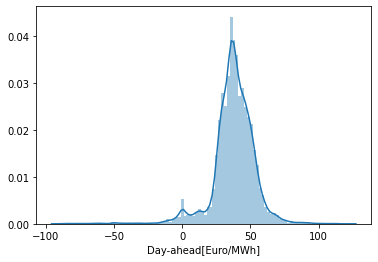

In [16]:
# Shows 'Day-ahead[Euro/MWh]' histogram.
sns.distplot(d_19['Day-ahead[Euro/MWh]'],bins=100)

# Definition of negative

In [17]:
# Day-ahead is below zero.
negative_price_d_19 = d_19[d_19['Day-ahead[Euro/MWh]'] <= 0]

In [18]:
negative_price_d_19['Day-ahead[Euro/MWh]'].describe()

count    212.000000
mean     -17.192453
std       21.899807
min      -90.010000
25%      -22.980000
50%       -7.225000
75%       -2.467500
max        0.000000
Name: Day-ahead[Euro/MWh], dtype: float64

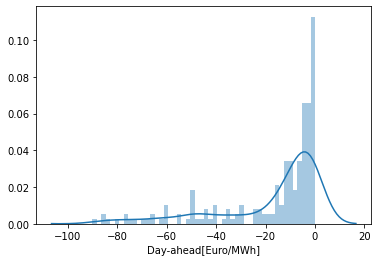

In [19]:
# Shows negative 'Day-ahead[Euro/MWh]' histogram.
sns.distplot(negative_price_d_19['Day-ahead[Euro/MWh]'],bins=50)

In [20]:
def create_graph(target,figsize_h,figsize_v,ax_horizontal,ax2_horizontal,bins):
    fig = plt.figure(figsize=(figsize_h,figsize_v))
    ax = fig.add_subplot(1,1,1)
    ax.plot(negative_price_d_19.groupby(target)['Day-ahead[Euro/MWh]'].median(),label='Median',linewidth = 3.0,color='blue')
    ax.plot(negative_price_d_19.groupby(target)['Day-ahead[Euro/MWh]'].min(),label='Min',linewidth = 3.0,color='green')
    ax.legend(bbox_to_anchor=(ax_horizontal, 0.5), loc='center right')
    ax.set_xlabel(target)
    plt.xticks(rotation=90)
    ax.set_ylabel('Day-ahead[Euro/MWh]')
    ax.grid(True)

    ax2 = ax.twinx()
    ax2.hist(x=negative_price_d_19[target],color="red",alpha=0.3, bins=bins,label='Occurrence')
    ax2.legend(bbox_to_anchor=(ax2_horizontal, 0.5),loc='center left')
    ax2.set_ylabel('Occurrence')

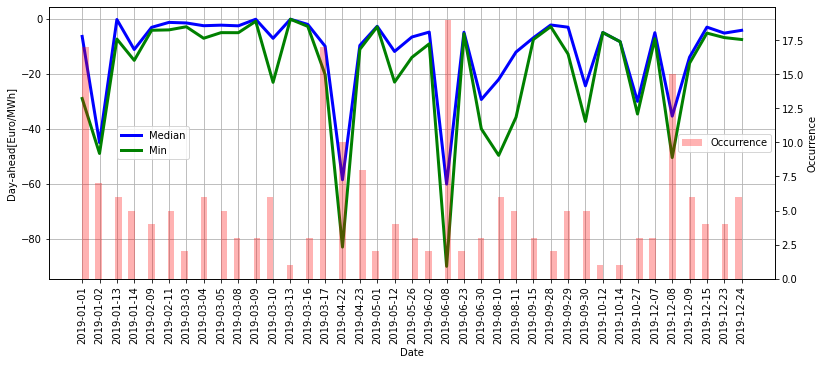

In [21]:
# Shows median and min. day-ahead price with number of occurrence on the days.
create_graph('Date',13,5,0.2,0.86,100)

0     13
1     17
2     21
3     19
4     16
5      9
6     10
7      6
8      5
9      4
10     7
11     5
12     8
13    15
14    20
15    14
16     7
17     3
18     2
19     1
20     2
21     2
22     1
23     5
Name: Time (hours), dtype: int64

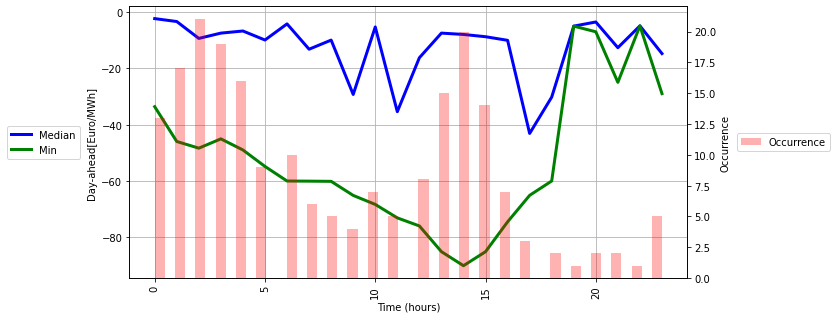

In [22]:
# Shows median and min. day-ahead price with number of occurrence in 24 hours.
create_graph('Time (hours)',10,5,-0.08,1.08,50)
negative_price_d_19['Time (hours)'].value_counts(sort=False)

0    42
1    36
2    10
4     3
5    41
6    80
Name: Day_of_week, dtype: int64

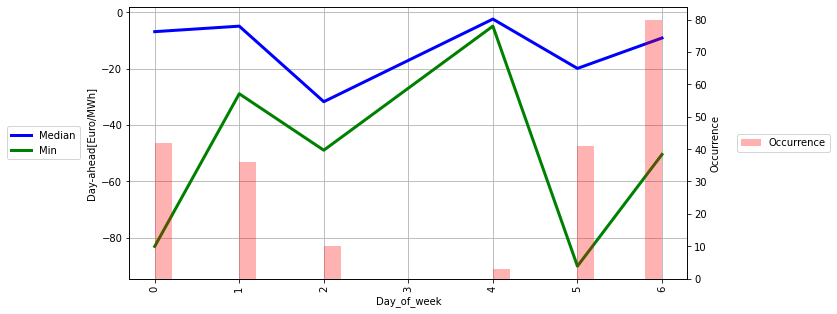

In [23]:
# Shows median and min. day-ahead price with number of occurrence on day of week.
create_graph('Day_of_week',10,5,-0.08,1.08,30)
negative_price_d_19['Day_of_week'].value_counts(sort=False)

1     35
2      9
3     46
4     18
5      9
6     26
8     11
9     15
10     5
12    38
Name: Month, dtype: int64

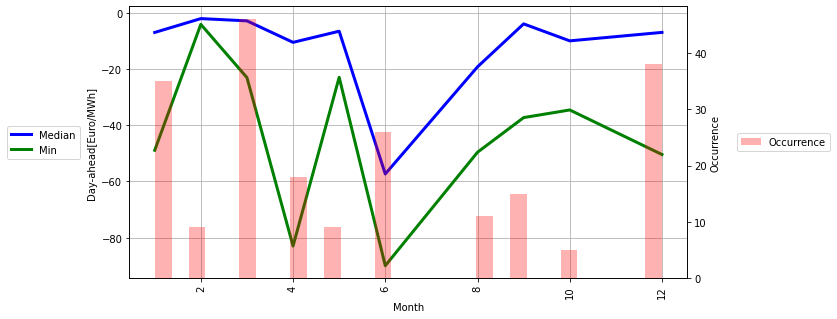

In [24]:
# Shows median and min. day-ahead price with number of occurrence in months.
create_graph('Month',10,5,-0.08,1.08,30)
negative_price_d_19['Month'].value_counts(sort=False)

# Graphical analysis

## Negative price

In [25]:
# Shows frequency of the negative price
print('Date        Frequency')
print(negative_price_d_19['Date'].value_counts().head(20))

Date        Frequency
2019-06-08    19
2019-03-17    17
2019-01-01    17
2019-12-08    15
2019-04-22    10
2019-04-23     8
2019-01-02     7
2019-03-10     6
2019-12-09     6
2019-08-10     6
2019-01-13     6
2019-03-04     6
2019-12-24     6
2019-09-29     5
2019-08-11     5
2019-03-05     5
2019-01-14     5
2019-09-30     5
2019-02-11     5
2019-12-23     4
Name: Date, dtype: int64


In [26]:
# Creates data of these dates.
time_2019_0608 = d_19[(d_19['Date'] == '2019-06-08')]
time_2019_0317 = d_19[(d_19['Date'] == '2019-03-17')]
time_2019_0101 = d_19[(d_19['Date'] == '2019-01-01')]
time_2019_1208 = d_19[(d_19['Date'] == '2019-12-08')]
time_2019_0422 = d_19[(d_19['Date'] == '2019-04-22')]
time_2019_0423 = d_19[(d_19['Date'] == '2019-04-23')]
time_2019_0102 = d_19[(d_19['Date'] == '2019-01-02')]
time_2019_0810 = d_19[(d_19['Date'] == '2019-08-10')]

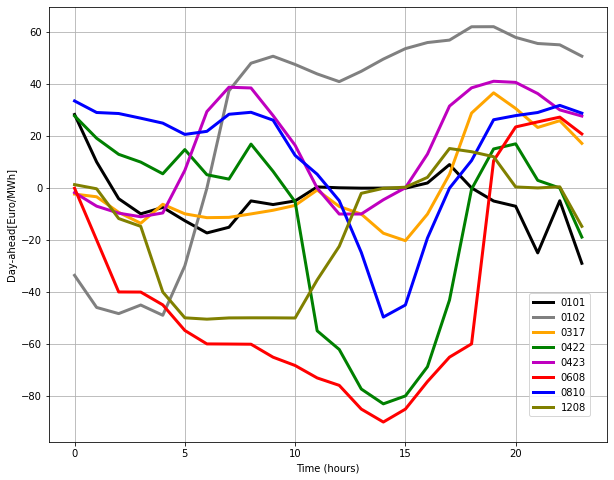

In [27]:
# Shows trends of 'Day-ahead[Euro/MWh]' in 24 hours.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
x = np.linspace(0,23,1)
ax.plot(time_2019_0101['Time (hours)'],time_2019_0101['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0101',color='k')
ax.plot(time_2019_0102['Time (hours)'],time_2019_0102['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0102',color='grey')
ax.plot(time_2019_0317['Time (hours)'],time_2019_0317['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0317',color='orange')
ax.plot(time_2019_0422['Time (hours)'],time_2019_0422['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0422',color='green')
ax.plot(time_2019_0423['Time (hours)'],time_2019_0423['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0423',color='m')
ax.plot(time_2019_0608['Time (hours)'],time_2019_0608['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0608',color='red')
ax.plot(time_2019_0810['Time (hours)'],time_2019_0810['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0810',color='blue')
ax.plot(time_2019_1208['Time (hours)'],time_2019_1208['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='1208',color='olive')


ax.legend(bbox_to_anchor=(0.85, 0.2), loc='center left')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Day-ahead[Euro/MWh]')
ax.grid(True)

In [28]:
time_2019_0421 = d_19[(d_19['Date'] == '2019-04-21')]

In [29]:
forecast_list = list(['Day-ahead[Euro/MWh]', 'Rate_RE/sum', 'Rate_load/sum','Gene_sum_forecast[MWh]','Load_forecast[MWh]',
                      'Photovoltaics_forecast[MWh]','Wind_onshore_forecast[MWh]', 'Wind_offshore_forecast[MWh]', 'Other_forecast[MWh]'])

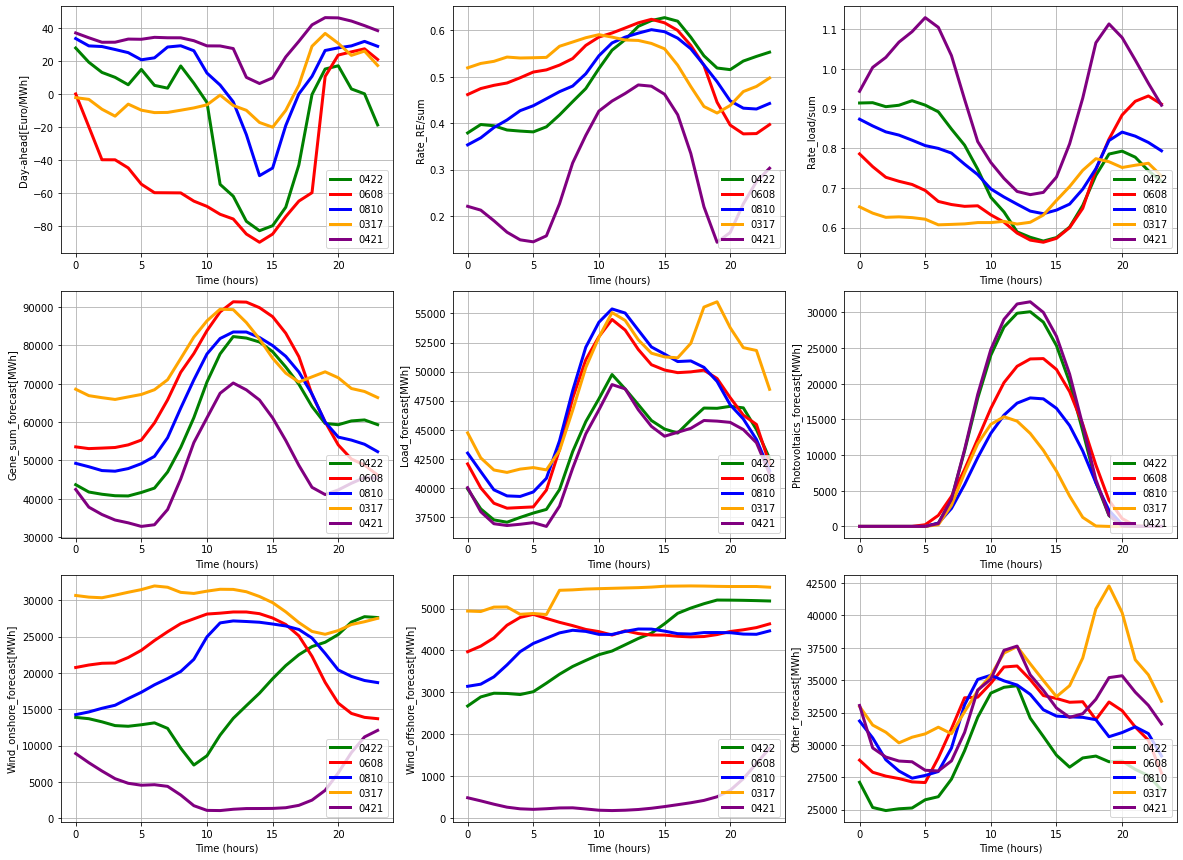

In [30]:
# Creates diagrams with other forecast features.
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.18, hspace=0.15)
for idx,i in enumerate(forecast_list):
    ax = fig.add_subplot(3, 3,idx+1)
    ax.plot(time_2019_0422['Time (hours)'],time_2019_0422[i], color='green',  linestyle='solid', linewidth = 3.0, label='0422')
    ax.plot(time_2019_0608['Time (hours)'],time_2019_0608[i], color='red',  linestyle='solid', linewidth = 3.0, label='0608')
    ax.plot(time_2019_0810['Time (hours)'],time_2019_0810[i], color='blue',  linestyle='solid', linewidth = 3.0, label='0810')
    ax.plot(time_2019_0317['Time (hours)'],time_2019_0317[i], color='orange',  linestyle='solid', linewidth = 3.0, label='0317')
    ax.plot(time_2019_0421['Time (hours)'],time_2019_0421[i], color='purple',  linestyle='solid', linewidth = 3.0, label='0421')
    ax.legend(loc='lower right')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel(i)
    ax.grid(True)
    fig.show()
    fig.show()

# Events on specific date  
The number of football matches was extracted by web scripting.

In [31]:
df_all_football = pd.read_csv('No_all_football_match.csv')
df_all_football = df_all_football.fillna(0)
df_all_football.head()

,Football_count,date
0,4,2019-02-01
1,17,2019-03-01
2,3,2019-04-01
3,30,2019-05-01
4,2,2019-06-01


In [32]:
minimum = d_19.groupby('Date')['Day-ahead[Euro/MWh]'].min()
minimum = pd.DataFrame(minimum)
minimum.rename(columns = {'Day-ahead[Euro/MWh]':'Min'}, inplace = True) 
median = d_19.groupby('Date')['Day-ahead[Euro/MWh]'].median()
median = pd.DataFrame(median)
median.rename(columns = {'Day-ahead[Euro/MWh]':'Median'}, inplace = True) 
maximum = d_19.groupby('Date')['Day-ahead[Euro/MWh]'].max()
maximum = pd.DataFrame(maximum)
maximum.rename(columns = {'Day-ahead[Euro/MWh]':'Max'}, inplace = True) 

In [33]:
temp = pd.merge(minimum,median, left_on='Date', right_on='Date', how='left')
df_day_ahead = pd.merge(temp,maximum, left_on='Date', right_on='Date', how='left')
df_day_ahead.head()

,Min,Median,Max
Date,,,
2019-01-01,-28.93,-4.900,28.32
2019-01-02,-48.93,47.815,62.11
2019-01-03,42.91,60.875,69.55
2019-01-04,31.41,51.505,55.78
2019-01-05,18.37,49.880,61.64


In [34]:
df_temp = pd.merge(df_day_ahead,df_all_football, left_on='Date', right_on='date', how='left')
df_temp['date']=df_day_ahead.index
df_temp.head()

,Min,Median,Max,Football_count,date
0,-28.93,-4.900,28.32,NaN,2019-01-01
1,-48.93,47.815,62.11,NaN,2019-01-02
2,42.91,60.875,69.55,NaN,2019-01-03
3,31.41,51.505,55.78,NaN,2019-01-04
4,18.37,49.880,61.64,NaN,2019-01-05


In [35]:
# Extracts number of negative day-ahead at each day.
negative_price_d_19_count = negative_price_d_19['Date'].value_counts()
negative_price_d_19_count = pd.DataFrame(data=negative_price_d_19_count)
negative_price_d_19_count['date'] = negative_price_d_19_count.index
negative_price_d_19_count = negative_price_d_19_count.reset_index().drop("index", axis=1)
negative_price_d_19_count = negative_price_d_19_count.rename(columns = {"Date": "No_negative"})

In [36]:
df_temp = pd.merge(df_temp,negative_price_d_19_count, left_on='date', right_on='date', how='left')
df_temp = df_temp.fillna(0)
df_temp.head()

,Min,Median,Max,Football_count,date,No_negative
0,-28.93,-4.900,28.32,0.0,2019-01-01,17.0
1,-48.93,47.815,62.11,0.0,2019-01-02,7.0
2,42.91,60.875,69.55,0.0,2019-01-03,0.0
3,31.41,51.505,55.78,0.0,2019-01-04,0.0
4,18.37,49.880,61.64,0.0,2019-01-05,0.0


In [37]:
df_pro_football = pd.read_csv('No_pro_football_match.csv')
df_pro_football = df_pro_football.fillna(0)
df_pro_football.head()

,Bundesliga,2.Bundesliga,3.liga,date
0,9.0,0.0,10.0,2019-05-18
1,8.0,0.0,10.0,2019-05-11
2,6.0,3.0,6.0,2019-04-27
3,6.0,3.0,6.0,2019-04-06
4,6.0,4.0,7.0,2019-04-20


In [38]:
df_pro_football['Foodball_pro'] = df_pro_football['Bundesliga']+df_pro_football['2.Bundesliga']+df_pro_football['3.liga']
df_pro_football.head()

,Bundesliga,2.Bundesliga,3.liga,date,Foodball_pro
0,9.0,0.0,10.0,2019-05-18,19.0
1,8.0,0.0,10.0,2019-05-11,18.0
2,6.0,3.0,6.0,2019-04-27,15.0
3,6.0,3.0,6.0,2019-04-06,15.0
4,6.0,4.0,7.0,2019-04-20,17.0


In [39]:
final = pd.merge(df_temp,df_pro_football, left_on='date', right_on='date', how='left')
final_df = final[['Min','Median','Max','Football_count','No_negative','Foodball_pro','date']]
final_df = final_df.fillna(0)
final_df

,Min,Median,Max,Football_count,No_negative,Foodball_pro,date
0,-28.93,-4.900,28.32,0.0,17.0,0.0,2019-01-01
1,-48.93,47.815,62.11,0.0,7.0,0.0,2019-01-02
2,42.91,60.875,69.55,0.0,0.0,0.0,2019-01-03
3,31.41,51.505,55.78,0.0,0.0,0.0,2019-01-04
4,18.37,49.880,61.64,0.0,0.0,0.0,2019-01-05
...,...,...,...,...,...,...,...
360,28.67,39.205,49.38,0.0,0.0,0.0,2019-12-27
361,27.40,34.725,43.75,0.0,0.0,0.0,2019-12-28
362,20.97,30.600,41.16,0.0,0.0,0.0,2019-12-29
363,1.40,29.990,39.35,0.0,0.0,0.0,2019-12-30


In [40]:
final_df.rename(columns = {'Min':'Min_day-ahead',
                           'Median':'Median_day-ahead',
                           'Max':'Max_day-ahead',
                           'Football_count':'All_football_count',
                           'No_negative':'Negative_count',
                           'Foodball_pro':'Pro_football_count',
                           'date':'Date'
                          }, inplace = True) 
final_df.head()

,Min_day-ahead,Median_day-ahead,Max_day-ahead,All_football_count,Negative_count,Pro_football_count,Date
0,-28.93,-4.900,28.32,0.0,17.0,0.0,2019-01-01
1,-48.93,47.815,62.11,0.0,7.0,0.0,2019-01-02
2,42.91,60.875,69.55,0.0,0.0,0.0,2019-01-03
3,31.41,51.505,55.78,0.0,0.0,0.0,2019-01-04
4,18.37,49.880,61.64,0.0,0.0,0.0,2019-01-05


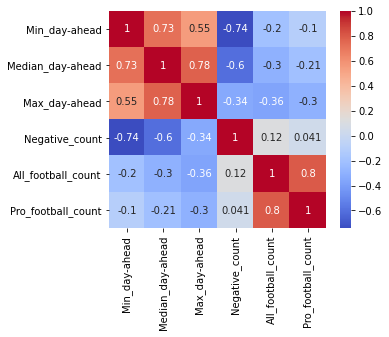

In [41]:
#e = final_df.copy()
plt.figure(figsize=(5,4))
sns.heatmap(round(final_df[['Min_day-ahead','Median_day-ahead','Max_day-ahead','Negative_count',
                            'All_football_count','Pro_football_count']].corr(),4), square=True, 
            cmap="coolwarm",annot = True)
plt.show()

In [42]:
df_regression = final_df[['Date','Min_day-ahead','Median_day-ahead','Max_day-ahead',
                          'Negative_count','All_football_count','Pro_football_count']]
df_regression.head()

,Date,Min_day-ahead,Median_day-ahead,Max_day-ahead,Negative_count,All_football_count,Pro_football_count
0,2019-01-01,-28.93,-4.900,28.32,17.0,0.0,0.0
1,2019-01-02,-48.93,47.815,62.11,7.0,0.0,0.0
2,2019-01-03,42.91,60.875,69.55,0.0,0.0,0.0
3,2019-01-04,31.41,51.505,55.78,0.0,0.0,0.0
4,2019-01-05,18.37,49.880,61.64,0.0,0.0,0.0


In [43]:
df_regression['Negative_price'] = df_regression['Negative_count'] > 0
df_regression['Negative_price'] = df_regression['Negative_price']*1
df_regression['Pro_football'] = df_regression['Pro_football_count'] > 0
df_regression['Pro_football'] = df_regression['Pro_football']*1
df_regression.head()

,Date,Min_day-ahead,Median_day-ahead,Max_day-ahead,Negative_count,All_football_count,Pro_football_count,Negative_price,Pro_football
0,2019-01-01,-28.93,-4.900,28.32,17.0,0.0,0.0,1,0
1,2019-01-02,-48.93,47.815,62.11,7.0,0.0,0.0,1,0
2,2019-01-03,42.91,60.875,69.55,0.0,0.0,0.0,0,0
3,2019-01-04,31.41,51.505,55.78,0.0,0.0,0.0,0,0
4,2019-01-05,18.37,49.880,61.64,0.0,0.0,0.0,0,0


In [44]:
# Creates daily data such as date_cet, date, month, day_of_week.
df_datetime = pd.date_range(start='01/01/2019', end='12/31/2019',freq='D', tz='Europe/Berlin').to_series()
date = df_datetime.dt.date
month = df_datetime.dt.month
day_of_week = df_datetime.dt.dayofweek
time = df_datetime.dt.hour
df_datetime = pd.DataFrame(df_datetime,columns = ['Date_cet']).reset_index().drop("index", axis=1)

date = create_datetime(date,'Date')
month = create_datetime(month,'Month')
day_of_week = create_datetime(day_of_week,'Day_of_week')
df_date = pd.concat([df_datetime,date['Date'],month['Month'],day_of_week['Day_of_week']],axis=1)
df_date['Date_cet'] = df_date['Date_cet'].apply(str)
df_date['Date'] = df_date['Date'].apply(str)
df_date.head()

,Date_cet,Date,Month,Day_of_week
0,2019-01-01 00:00:00+01:00,2019-01-01,1,1
1,2019-01-02 00:00:00+01:00,2019-01-02,1,2
2,2019-01-03 00:00:00+01:00,2019-01-03,1,3
3,2019-01-04 00:00:00+01:00,2019-01-04,1,4
4,2019-01-05 00:00:00+01:00,2019-01-05,1,5


In [45]:
df_regression = pd.merge(df_date,df_regression, left_on='Date', right_on='Date', how='left')
df_regression.head()

,Date_cet,Date,Month,Day_of_week,Min_day-ahead,Median_day-ahead,Max_day-ahead,Negative_count,All_football_count,Pro_football_count,Negative_price,Pro_football
0,2019-01-01 00:00:00+01:00,2019-01-01,1,1,-28.93,-4.900,28.32,17.0,0.0,0.0,1,0
1,2019-01-02 00:00:00+01:00,2019-01-02,1,2,-48.93,47.815,62.11,7.0,0.0,0.0,1,0
2,2019-01-03 00:00:00+01:00,2019-01-03,1,3,42.91,60.875,69.55,0.0,0.0,0.0,0,0
3,2019-01-04 00:00:00+01:00,2019-01-04,1,4,31.41,51.505,55.78,0.0,0.0,0.0,0,0
4,2019-01-05 00:00:00+01:00,2019-01-05,1,5,18.37,49.880,61.64,0.0,0.0,0.0,0,0


In [46]:
def regression(x,y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    return results.summary()


def save_regression_result(x,y,fig_size,name):
    result = regression(x, y)
    plt.rc('figure', figsize=(8.7, fig_size))
    plt.text(0.01, 0.05, str(result), {'fontsize': 15}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'{name}.png')

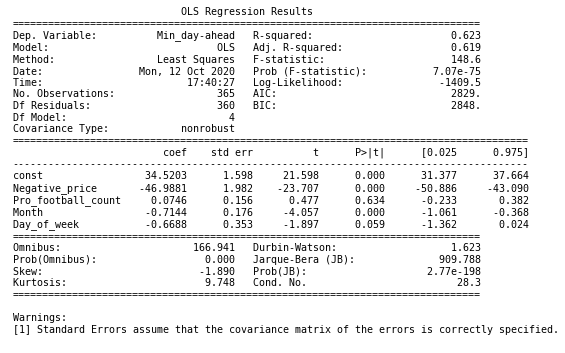

In [47]:
save_regression_result(df_regression[['Negative_price','Pro_football_count','Month','Day_of_week']],
                       df_regression['Min_day-ahead'], 5, 'name1')

In [48]:
df_regression_negative = df_regression[df_regression['Negative_price']==1]

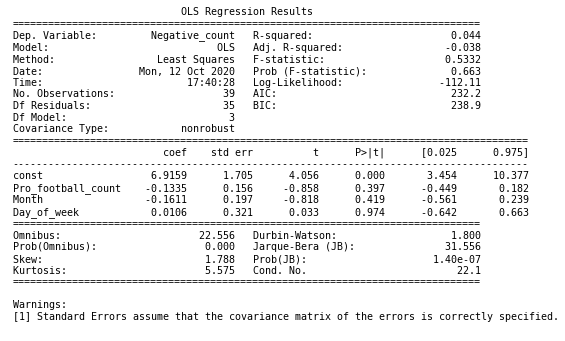

In [49]:
save_regression_result(df_regression_negative[['Pro_football_count','Month','Day_of_week']],
                       df_regression_negative['Negative_count'], 5, 'name2')